## Visualizing Filters of a Convolutional Neural Network

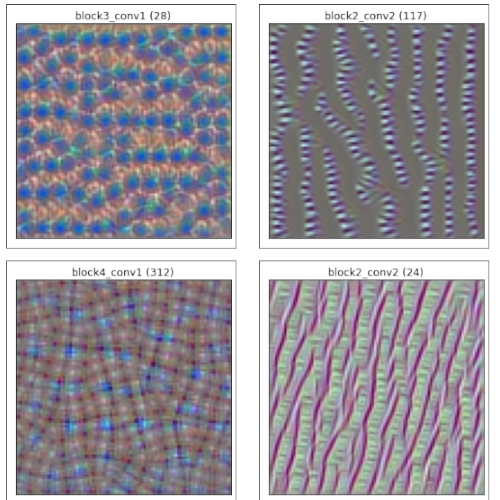

## Task 2: Downloading the Model

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__)

TF Version: 2.5.0


In [ ]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet',
    input_shape=(96, 96, 3)
)
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

## Task 3: Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )
get_submodel('block1_conv2').summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [ ]:
def create_image():
  return tf.random.uniform((96,96,3))
def plot_image(image, title='random'):
  image=image-tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

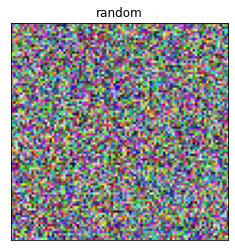

In [ ]:
image=create_image()
plot_image(image)

## Task 5: Training Loop

In [ ]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel=get_submodel(layer_name)
  num_filter=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0, num_filter-1)
  assert num_filter>f_index, 'f_index is out of bounds'

  image=create_image()
  verbose_step=int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(out)
    grads=tape.gradient(loss, image)
    grads=tf.math.l2_normalize(grads)
    image+=grads*10

    if(i+1) % verbose_step==0:
      print(f'Iteration:{i+1}, loss:{loss.numpy(): 4f}')
  plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration:10, loss: 0.000000
Iteration:20, loss: 0.000000
Iteration:30, loss: 0.000000
Iteration:40, loss: 0.000000
Iteration:50, loss: 0.000000
Iteration:60, loss: 0.000000
Iteration:70, loss: 0.000000
Iteration:80, loss: 0.000000
Iteration:90, loss: 0.000000
Iteration:100, loss: 0.000000


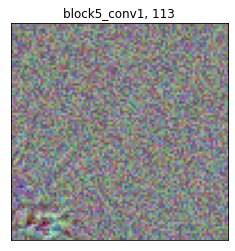

In [33]:
layer_name='block5_conv1'
visualize_filter(layer_name, iters=100)


Iteration:10, loss: 4.071964
Iteration:20, loss: 7.236822
Iteration:30, loss: 10.462705
Iteration:40, loss: 13.728441
Iteration:50, loss: 17.021589
Iteration:60, loss: 20.335775
Iteration:70, loss: 23.661621
Iteration:80, loss: 26.997467
Iteration:90, loss: 30.340658
Iteration:100, loss: 33.691422


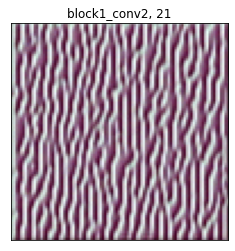

In [28]:
layer_name='block1_conv2'
visualize_filter(layer_name, iters=100)


Iteration:10, loss: 6.520954
Iteration:20, loss: 11.482158
Iteration:30, loss: 17.025049
Iteration:40, loss: 23.068880
Iteration:50, loss: 29.490715
Iteration:60, loss: 36.238422
Iteration:70, loss: 43.233551
Iteration:80, loss: 50.385147
Iteration:90, loss: 57.712997
Iteration:100, loss: 65.157570


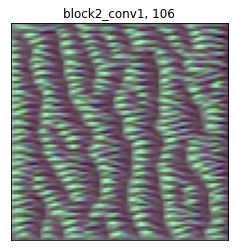

In [29]:
layer_name='block2_conv1'
visualize_filter(layer_name, iters=100)

Iteration:10, loss: 63.283657
Iteration:20, loss: 110.204300
Iteration:30, loss: 157.986359
Iteration:40, loss: 206.259445
Iteration:50, loss: 254.884872
Iteration:60, loss: 303.732788
Iteration:70, loss: 352.753204
Iteration:80, loss: 401.952484
Iteration:90, loss: 451.314941
Iteration:100, loss: 500.815369


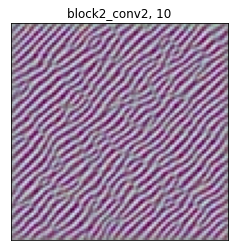

In [30]:
layer_name='block2_conv2'
visualize_filter(layer_name, iters=100)

Iteration:10, loss: 29.262451
Iteration:20, loss: 55.233894
Iteration:30, loss: 82.929291
Iteration:40, loss: 111.996078
Iteration:50, loss: 141.977890
Iteration:60, loss: 172.510010
Iteration:70, loss: 203.407761
Iteration:80, loss: 234.579971
Iteration:90, loss: 266.010620
Iteration:100, loss: 297.624878


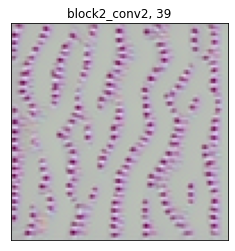

In [31]:
layer_name='block2_conv2'
visualize_filter(layer_name, iters=100)

Iteration:10, loss: 82.161919
Iteration:20, loss: 145.430481
Iteration:30, loss: 214.502243
Iteration:40, loss: 285.738922
Iteration:50, loss: 358.004181
Iteration:60, loss: 430.968536
Iteration:70, loss: 504.330292
Iteration:80, loss: 578.108826
Iteration:90, loss: 652.108643
Iteration:100, loss: 726.303284


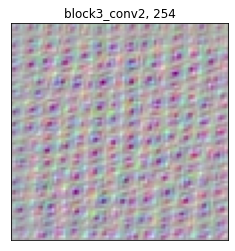

In [32]:
layer_name='block3_conv2'
visualize_filter(layer_name, iters=100)

Iteration:10, loss: 37.141151
Iteration:20, loss: 65.332733
Iteration:30, loss: 98.748322
Iteration:40, loss: 136.424408
Iteration:50, loss: 178.229630
Iteration:60, loss: 223.825500
Iteration:70, loss: 272.834412
Iteration:80, loss: 323.687592
Iteration:90, loss: 376.215271
Iteration:100, loss: 429.933838


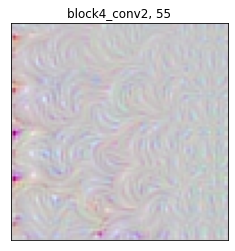

In [34]:
layer_name='block4_conv2'
visualize_filter(layer_name, iters=100)